In [3]:
#Basic Neuron
import numpy as np

class BasicNeuron:
    def __init__(self,num_inputs ,activation_function):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand(1)
        self.activation_function = activation_function
    def forward(self, inputs):
        inputs = np.asarray(inputs).reshape(-1)
        sum = np.dot(self.weights, inputs)+self.bias
        output = self.activation_function(sum)
        return output
def sigmoid(x):
    return 1/(1+np.exp(-x))

neuron = BasicNeuron(3,sigmoid)
print(neuron.forward([1,2,3]))

[0.91011527]


In [37]:
#Perceptron

class Perceptron:
    def __init__(self, num_inputs, activation_function, lr=0.01):
        self.neuron = BasicNeuron(num_inputs, activation_function)
        self.lr = lr
    def predict(self, x):
        return self.neuron.forward(x)
    def train(self, t_inp, labels, epochs = 10):
        for _ in range(epochs):
            for inp, label in zip(t_inp, labels):
                pred = self.predict(inp)
                error = label-pred
                self.neuron.weights += error*self.lr*inp
                self.neuron.bias += error * self.lr

def step_function(x):
    return 1 if x>0 else 0

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

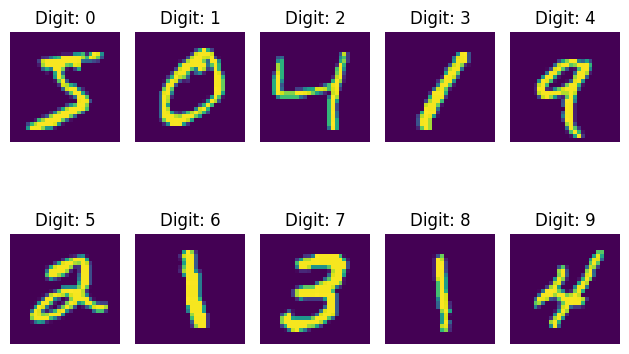

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,5)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis('off')
    ax.set_title(f'Digit: {i}')
plt.tight_layout()
plt.show()

In [9]:
digit_subsets = {}
digit_subsets = {d: X_train[y_train==d] for d in range(10)}

In [38]:
#normalizing and scaling the dataset to usable (can skip except normalization)
X_train_reshaped = X_train.reshape(X_train.shape[0],28*28) 
X_test_reshaped = X_test.reshape(X_test.shape[0],28*28) 

X_train_normalized = X_train_reshaped/255
X_test_normalized = X_test_reshaped/255

y_train_binary = np.array(y_train==1).astype(int)
y_test_binary = np.array(y_test==1).astype(int)

In [39]:
p = Perceptron(28*28, step_function)

In [40]:
p.train(X_train_normalized, y_train_binary)

In [41]:
preds = [p.predict(i) for i in X_test_normalized]

In [42]:
acc = np.sum((preds==y_test_binary).astype(int))/len(y_test)

In [43]:
acc

np.float64(0.9891)

In [48]:
all_labels, all_counts = np.unique(y_train, return_counts = True)

In [49]:
print(all_labels, all_counts)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [87]:
#MulticlassPerceptron

class MCP:
    def __init__(self, num_inputs,num_classes, activation_function, lr=0.001):
        self.neurons = [BasicNeuron(num_inputs, activation_function) for _ in range(num_classes)]
        self.lr = lr
        self.acc = [[] for _ in range(num_classes)]
    def predict(self, x):
        return np.argmax([nn.forward(x) for nn in self.neurons])
    def train(self, t_inp, labels, epochs = 10):
        for _ in range(epochs):
            correct = np.zeros(len(all_counts))
            for inp, label in zip(t_inp, labels):
                pred = self.predict(inp)
                error = (label!= pred).astype(int)
                if not error: correct[label]+=1
                self.neurons[label].weights+=error*self.lr*inp
                self.neurons[pred].weights -= error*self.lr*inp

                self.neurons[label].bias += error*self.lr
                self.neurons[pred].bias -= error*self.lr
            for l in all_labels:
                self.acc[l].append(correct[l]/all_counts[l])
        return self.acc

In [88]:
mcp = MCP(28*28, 10, step_function)

In [89]:
acc = mcp.train(X_train_normalized, y_train)

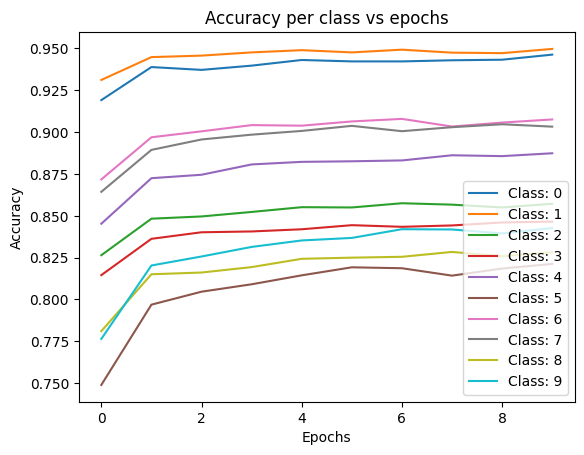

In [92]:
for i in all_labels:
    plt.plot(acc[i], label=f'Class: {i}')
plt.legend()
plt.title('Accuracy per class vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [93]:
predictions = np.array([mcp.predict(inputs) for inputs in X_test_normalized])
y_true = y_test

for cls in list(np.unique(y_true)):
    TP = np.sum((y_true == cls) & (predictions == cls))
    FP = np.sum((y_true != cls) & (predictions == cls))
    FN = np.sum((y_true == cls) & (predictions != cls))
    TN = np.sum((y_true != cls) & (predictions != cls))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall    = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    accuracy  = (TP + TN) / (TP + FP + FN + TN)

    print(
        f"Class {cls}: "
        f"Precision={precision:.4f} ({TP}/{TP+FP}), "
        f"Recall={recall:.4f} ({TP}/{TP+FN}), "
        f"Accuracy={accuracy:.4f} ({TP+TN}/{TP+FP+FN+TN})"
    )



Class 0: Precision=0.9641 (940/975), Recall=0.9592 (940/980), Accuracy=0.9925 (9925/10000)
Class 1: Precision=0.9120 (1119/1227), Recall=0.9859 (1119/1135), Accuracy=0.9876 (9876/10000)
Class 2: Precision=0.9188 (758/825), Recall=0.7345 (758/1032), Accuracy=0.9659 (9659/10000)
Class 3: Precision=0.7358 (919/1249), Recall=0.9099 (919/1010), Accuracy=0.9579 (9579/10000)
Class 4: Precision=0.8772 (893/1018), Recall=0.9094 (893/982), Accuracy=0.9786 (9786/10000)
Class 5: Precision=0.8327 (702/843), Recall=0.7870 (702/892), Accuracy=0.9669 (9669/10000)
Class 6: Precision=0.8948 (885/989), Recall=0.9238 (885/958), Accuracy=0.9823 (9823/10000)
Class 7: Precision=0.9275 (883/952), Recall=0.8589 (883/1028), Accuracy=0.9786 (9786/10000)
Class 8: Precision=0.8165 (774/948), Recall=0.7947 (774/974), Accuracy=0.9626 (9626/10000)
Class 9: Precision=0.8778 (855/974), Recall=0.8474 (855/1009), Accuracy=0.9727 (9727/10000)


In [108]:
#losses
def mse(p,y):
    return ((p-y)**2)/2
def bce(p,y):
    p = np.clip(p, 1e-10, 1-1e-10)
    return -(y* np.log(p) + (1-y)*np.log(1-p))
def focal_loss(p,y, alpha = 0.5, gamma=2):
    p = np.clip(p, 1e-10, 1-1e-10)
    if y==1:
       return -alpha*(((1-p)**gamma)* np.log(p))
    else:
       return -(1-alpha)*(p**gamma * np.log(1-p))

def hinge_loss(p,y):
    np.clip(p,1e-10, 1-1e-10)
    z = np.log(p/1-p)        # margin proxy
    t = 2*y - 1         # {0,1} -> {-1,+1}
    return np.maximum(0.0, 1 - t*z)

In [109]:
#activations

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def relu(x):
    return np.where(x>=0, x, 0)

def leaky_relu(x, alpha=0.001):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha = 0.001):
    return np.where(x>=0,x,alpha*(np.exp(x)-1))

In [110]:
#derivatives of activations

def sigmoid_d(a): #a -> sigmoid(z)
    return a*(1-a)
def tanh_d(a):
    return 1-a**2
def relu_d(z):
    return np.where(z>0,1,0)
def leaky_relu_d(z, alpha = 0.001):
    return np.where(z>=0,1,alpha)
def elu_d(z, alpha = 0.001):
    return np.where(z>=0, 1, alpha*np.exp(z))

C:\Users\adity\AppData\Local\Temp\ipykernel_18232\3036161081.py:16: RuntimeWarning: divide by zero encountered in log
  z = np.log(p/1-p)        # margin proxy


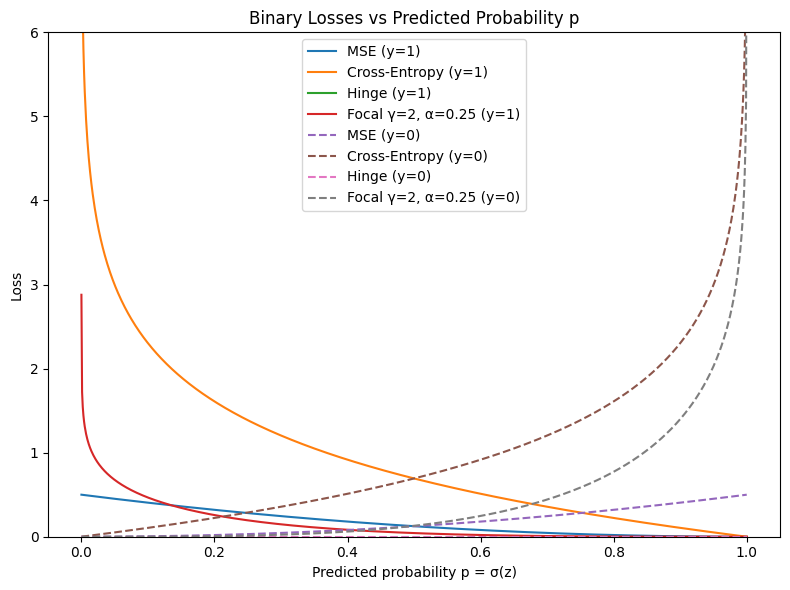

In [111]:
p = np.linspace(1e-5, 1-1e-5, 1000)

plt.figure(figsize=(8, 6))
# y = 1
plt.plot(p, mse(p, 1), label="MSE (y=1)")
plt.plot(p, bce(p, 1), label="Cross-Entropy (y=1)")
plt.plot(p, [hinge_loss(x, 1) for x in p], label="Hinge (y=1)")
plt.plot(p, [focal_loss(pi, 1, gamma=2.0, alpha=0.25) for pi in p], label="Focal γ=2, α=0.25 (y=1)")
# y = 0
plt.plot(p, mse(p, 0), label="MSE (y=0)", linestyle="--")
plt.plot(p, bce(p, 0), label="Cross-Entropy (y=0)", linestyle="--")
plt.plot(p, [hinge_loss(x, 0) for x in p], label="Hinge (y=0)", linestyle="--")
plt.plot(p, [focal_loss(pi, 0, gamma=2.0, alpha=0.25) for pi in p], label="Focal γ=2, α=0.25 (y=0)", linestyle="--")

plt.title("Binary Losses vs Predicted Probability p")
plt.xlabel("Predicted probability p = σ(z)")
plt.ylabel("Loss")
plt.ylim(0, 6)
plt.legend()
plt.tight_layout()
plt.savefig('loss_vs_p.png')
plt.show()

In [112]:
#gradients loss wrt to logits
def grad_bce_wrt_z(z, y):
    p = sigmoid(z)
    return (p - y)  # BCE-with-logits: ∂L/∂z = σ(z) - y

def grad_mse_wrt_z(z, y):
    p = sigmoid(z)
    return 2*(p - y) * p*(1-p)  # chain rule through sigmoid

In [ ]:
class MLP:
    def __init__(num_inputs, num_hidden, num_outputs, activation_function='relu', lr=0.001):
        self.hidden = [
            BasicNeuron(num_inputs, activation_function)
            for _ in range(num_hidden)
        ]
        self.lr = lr
        self.W_out = np.random.randn(num_outputs, num_hidden) * np.sqrt(2.0/num_hidden)
        self.b_out = np.zeros(num_outputs)
    def forward(self, x):
        x = np.asarray(x).flatten()
        self.x = x

        h = np.array([neuron.forward(x) for neuron in self.hidden])
        self.h = h

        z_out = self.W_out.dot(h) + self.b_out

        y = softmax(z_out)
        self.y = y
        return y
    def backward(self, y_true, loss="mse"):
        y = y_true.flatten()

        if loss == "mse":
            g = self.y - y
            s = float(self.y @ g)
            delta_out = self.y * (g - s)
        elif loss == "ce":
            delta_out = self.y - y
        else:
            raise ValueError("Unsupported loss")

        W_out_before = self.W_out.copy()

        self.W_out -= self.lr * np.outer(delta_out, self.h)
        self.b_out -= self.lr * delta_out

        delta_h = W_out_before.T @ delta_out
        z_hidden = np.array([np.dot(neuron.weights, self.x) + neuron.bias for neuron in self.hidden])
        delta_h *= self.deriv_h(z_hidden)

        for i, neuron in enumerate(self.hidden):
            neuron.weights -= self.lr * delta_h[i] * self.x
            neuron.bias    -= self.lr * delta_h[i]

    def train(self, X, Y, epochs=5, loss="mse"):
        n = len(X)

        for epoch in range(1, epochs+1):
            perm = np.random.permutation(n)
            total_loss = 0.0
            correct = 0

            for idx in perm:
                x_i = X[idx]
                y_i = Y[idx]

                y_pred = self.forward(x_i)
                if loss == "ce":
                    total_loss += ce_loss(y_i, y_pred)
                else:
                    total_loss += mse_loss(y_i, y_pred)

                if np.argmax(y_pred) == np.argmax(y_i):
                    correct += 1

                self.backward(y_i, loss)

            avg_loss = total_loss / n
            acc = correct / n
            print(f"Epoch {epoch}/{epochs} — Loss: {avg_loss:.4f}, Acc: {acc:.4f}")

        print("Training complete.")

    def predict(self, x):
        if x.ndim == 1:
            y = self.forward(x)
            return np.argmax(y)
        else:
            return np.array([self.predict(xi) for xi in x])

    def evaluate(self, X, Y):
        preds = self.predict(X)
        true  = np.argmax(Y, axis=1)
        acc = np.mean(preds == true)
        print(f"Test accuracy: {acc:.4f}")
        return acc
